In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer

In [71]:
dfr = pd.read_csv('./Data/winequality-red.csv', sep = ';')

In [72]:
dfr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [73]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [74]:
X = dfr.iloc[:, :11]#.values
y = dfr.iloc[:, 11]#.values

In [75]:
X.shape

(1599, 11)

In [76]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


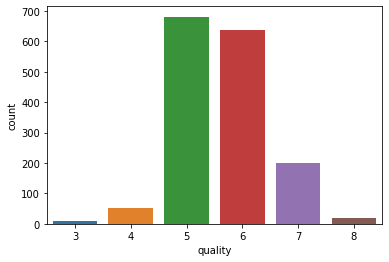

In [77]:
sns.countplot(dfr['quality'])

In [78]:
dfr.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [85]:
y_c = pd.get_dummies(y).values

In [86]:
type(y_c)

numpy.ndarray

In [84]:
y_c.values

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0]], dtype=uint8)

## For binary classification

In [20]:
y_b = y.copy()

In [21]:
y_b.values[y_b.values <= 5] = 0
y_b.values[y_b.values > 5] = 1

In [25]:
y_b[:10]

0    0
1    0
2    0
3    1
4    0
5    0
6    0
7    1
8    1
9    0
Name: quality, dtype: int64

In [26]:
y_b.value_counts()

1    855
0    744
Name: quality, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_b, test_size = 0.2)
ytrain.shape

(1279,)

In [39]:
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)
X = sc.transform(X)

In [43]:
ytrain

543     1
425     1
461     0
306     0
987     0
1290    0
773     1
204     1
273     0
166     0
272     0
651     0
688     0
960     1
877     1
937     0
803     1
125     0
411     0
640     0
721     0
1156    1
606     1
1113    1
211     1
680     0
544     1
730     0
634     0
1593    1
       ..
103     0
1192    1
1598    1
476     0
1569    1
595     0
1405    1
1255    0
1059    1
1260    0
105     0
853     1
841     0
1472    1
860     0
1034    1
924     0
627     0
72      0
75      0
1160    1
1517    1
1498    1
482     0
1153    1
1389    0
1265    1
207     0
348     1
644     0
Name: quality, Length: 1279, dtype: int64

In [31]:
from sklearn.linear_model import LogisticRegression

In [33]:
logreg = LogisticRegression().fit(Xtrain, ytrain)

/Users/jolyndevis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
pred = logreg.predict(Xtest)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       162
           1       0.72      0.76      0.74       158

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320

